In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from fastText import train_supervised, train_unsupervised, load_model
from pathlib import Path
%matplotlib inline

In [3]:
psychic_learners_dir = Path.cwd()

In [4]:
beauty_model = load_model(str(psychic_learners_dir / 'data' / 'beauty_model.bin'))
fashion_model = load_model(str(psychic_learners_dir / 'data' / 'fashion_model.bin'))
mobile_model = load_model(str(psychic_learners_dir / 'data' / 'mobile_model.bin'))

In [36]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    categories = []
    for category in unique_labels(y_true, y_pred):
        categories.append(classes[category])
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=categories, yticklabels=categories,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.set_size_inches(8,8)
    return ax

In [6]:
valid_data = os.path.join(psychic_learners_dir, 'data', 'fashion_valid_split.txt')

In [12]:
preds = []
labels = []
with open(valid_data, 'r') as f:
    for example in f.readlines():
        label = example.split(' ')[0]
        text = example.split(' ')[1:]
        text = ' '.join(text).replace('\n', '')
        pred = fashion_model.predict(text)
        preds.append(int(pred[0][0].replace('__label__', '')))
        labels.append(int(label.replace('__label__', '')))

In [21]:
with open(str(psychic_learners_dir / 'data' / 'categories.json'), 'r') as f:
    categories_mapping = json.load(f)

In [26]:
class_mapping = {}
for key, item in categories_mapping['Fashion'].items():
    class_mapping[item] = key

Normalized confusion matrix
[[2.16998192e-01 2.49547920e-01 1.06690778e-01 6.50994575e-02
  5.42495479e-03 5.78661844e-02 7.23327306e-03 7.23327306e-03
  1.26582278e-01 8.67992767e-02 4.52079566e-02 1.80831826e-02
  5.42495479e-03 1.80831826e-03]
 [5.74255676e-03 7.42115028e-01 3.11865006e-02 5.95458963e-02
  3.00379892e-02 6.02526725e-02 1.14851135e-03 8.30462055e-03
  1.92596519e-02 2.82710487e-02 8.21627352e-03 5.12412757e-03
  7.06776217e-04 8.83470271e-05]
 [9.26268989e-03 2.26750648e-01 6.02074843e-01 5.89107077e-02
  2.14894405e-02 4.37198963e-02 7.41015191e-03 9.26268989e-03
  3.70507595e-03 1.40792886e-02 3.70507595e-04 2.22304557e-03
  7.41015191e-04 0.00000000e+00]
 [3.75375375e-03 2.72022022e-01 4.82982983e-02 5.63063063e-01
  2.12712713e-02 3.62862863e-02 7.00700701e-03 1.45145145e-02
  7.50750751e-03 1.77677678e-02 5.00500501e-03 2.75275275e-03
  5.00500501e-04 2.50250250e-04]
 [4.29184549e-03 4.49690033e-01 4.05340963e-02 6.72389127e-02
  3.08536004e-01 7.43919886e-02 1.

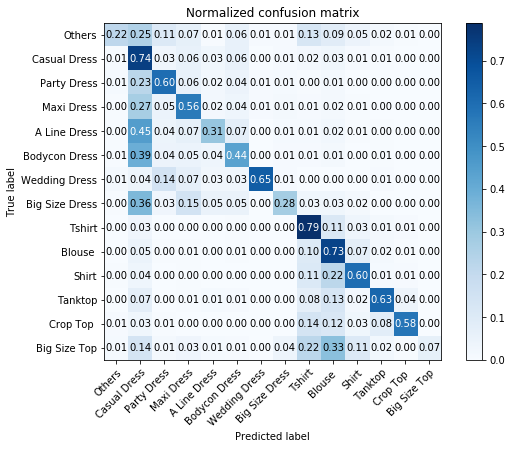

In [37]:
plot_confusion_matrix(labels, preds, class_mapping, normalize=True)